# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Описание услуг**

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

# План выполнения пректа

1. **Анализ данных:**
- Загрузить данные;
- Посмотреть данные определить состав, посмотреть информацию о датасете, статистику, определить наличие дубликатов и пропусков;
- При необходимости посмотреть уникальные значения признаков;
- Сделать описание данных и выводы по полученным данным.
2. **Предобработка данных:**
- Поиск проблем и ошибок в данных (пропущеные значения, дубликаты, не верный формат значений);
- Устранение и исправление проблем и ошибок в данных;
- Приведение данных в удобный для работы формат
- Сделать вывод о проведенной предобработке.
3. **Исследовательский анализ данных:**
- Построить графики распределения данных;
- Определить зависимости признаков, построить графики зависимости;
- Сделать выводы по проведенному анализу.
4. **Подготовка данных:**
- Разделить данные на обучающую и вылидационную выборки;
- Выделить признаки и целевой признак;
- Выполнить кодирование катигориальных признаков;
- Выполнить масштабирование численных признаков;
5. **Решение задачи:**
- Выбрать модели обучения;
- Определить метрики оценки качества моделей;
- Подобрать гиперпараметры обучения моделей;
- Обучить несколько моделей и оценить качество и время обучения моделей;
- Сделать выводы о качестве моделей и определить опримальную модель обучения для решения данной задачи.
6. **Тестирование модели:**
- Обучить модель на тестовых данных;
- Определить качество и время обучения модели.
7. **Общий вывод:**
- Сделать вывод о проделанной работе;
- Сделать вывод о качестве обучения выбранной и протестированной модели.

## Анализ данных

### Импорт библиотек

Импортируем библиотеки, которые могут понадобиться для выполнения проекта.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import RandomState
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from catboost import Pool

import warnings
RANDOM_STATE=130323

### Загрузка данных

In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

### Изучение файлов и информация по ним

Просмотри информацию о датасетах. Напишим функцию, котрая принимает датасет и возвращает информацию, статистику, наличие полных дубликатов и процент пропущеных значений в каждом столбце.

In [3]:
def info_data(df):
    # Вывести пять случайных строк
    print("Пять случайных строк датасета:")
    display(df.sample(5))
    print()

    # Вывести описание датасета
    print("Описание датасета:")
    display(df.describe())
    print()

    # Вывести информацию о датасете
    print("Информация о датасете:")
    df.info()
    print()

    # Посчитать количество дубликатов
    num_duplicates = df.duplicated().sum()
    print(f"Количество дубликатов в датасете: {num_duplicates}")
    print()

    # Посчитать количество пропущенных значений
    num_missing = df.isnull().sum().sum()
    print(f"Количество пропущенных значений в датасете: {num_missing}")

#### Датасет `contract`

In [4]:
info_data(contract)

Пять случайных строк датасета:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2926,0106-UGRDO,2014-05-01,No,Two year,Yes,Electronic check,116.00,8182.85
5727,8707-HOEDG,2014-04-01,No,Two year,Yes,Electronic check,110.20,7689.8
914,6024-RUGGH,2014-02-01,No,Two year,Yes,Bank transfer (automatic),25.20,1798.9
2016,8861-HGGKB,2019-02-01,2019-12-01 00:00:00,Month-to-month,No,Electronic check,86.45,830.85
3822,6137-NICCO,2019-08-01,No,Month-to-month,Yes,Mailed check,94.05,518.75



Описание датасета:


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Количество дубликатов в датасете: 0

Количество пропущенных значений в датасете: 0


Подсчитаем уникальные значения в столбцах customerID, EndDate, Type, PaperlessBilling, TotalCharges

In [5]:
unique_customers = contract['customerID'].nunique()
end_date_counts = contract['EndDate'].value_counts()
type_counts = contract['Type'].value_counts()
billing_counts = contract['PaperlessBilling'].value_counts()
method_counts = contract['PaymentMethod'].value_counts()
total_counts = contract['TotalCharges'].value_counts()


print(f'Количество уникальных значений в столбце customerID: {unique_customers}')
print('')
print('Уникальные значения и их количество в столбце EndDate:')
print(end_date_counts)
print('')
print('Уникальные значения и их количество в столбце Type:')
print(type_counts)
print('')
print('Уникальные значения и их количество в столбце PaperlessBilling:')
print(billing_counts)
print('')
print('Уникальные значения и их количество в столбце PaymentMethod:')
print(method_counts)
print('')
print('Уникальные значения и их количество в столбце TotalCharges:')
print(total_counts)

Количество уникальных значений в столбце customerID: 7043

Уникальные значения и их количество в столбце EndDate:
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

Уникальные значения и их количество в столбце Type:
Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

Уникальные значения и их количество в столбце PaperlessBilling:
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Уникальные значения и их количество в столбце PaymentMethod:
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Уникальные значения и их количество в столбце TotalCharges:
           11
20.2       11
19.75       9
19.65       8
20.05       8
           ..
749.25      1
6141.65     1
2619.25     1
6362.35     1
7774.05     

In [6]:
contract.query('TotalCharges == " "')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


**Описание датасета `contract`:**<br>
Датасет состоит из 7043 строк и 8 столбцов и содержит информацию о клиентах, датах заключения и расторжения договора его типе, способах выставления счетов, оплаты и расходах. В каждом столбце по 7043 значения, значит пропуски отсутствуют.
- `customerID` - идентификационный номер клиента. Тип данных в столбце - Object. Количество уникальных значений 7043, значит все номера пользователей уникальны и не повторяются;
- `BeginDate` - содержит информацию о дате заключения договора. Тип данных в столбце - Object, но корректнее будет если значения будут иметь тип данных datetime.
- `EndDate` - содержит информацию о дате расторжения договора. Тип данных в столбце - Object. Помимо значений с датами в столбце присутствует значение 'No', которое говорит о том что договор не расторгнут и продолжает действовать. Количество значений 'No' - 5174, а количество расторгнутых договоров 1869.<br>
Значения в данном столбце могут стать целевым признаком для предсказания оттока клиентов, если представить что клиенты, которые расторгли договор это признак, например "1", а те кто остались "0", то у нас появляется бинарный целевой признак.
- `Type` - содержит информацию о типе договора. Тип данных в столбце - Object. Всего в столбце присутствует три типа договоров: ежемесячный - Month-to-month (скорее всего продлеваемый каждый месяц), годовой - One year и двухгодичный - Two year.
- `PaperlessBilling` - значения в данном столбце говорят о том получает ли клиент бумажные квитанции об оплате или нет. Тип данных в столбце - Object. В столбце два значения "Yes" и "No", 4171 пользователь не получают бумажные квитанции, а 2872 пользователя еще получают бумажные квитанции.
- `PaymentMethod` - Способ оплаты счета. Тип данных в столбце - Object. Существует 4 способа оплаты счета "Electronic check" - электронная оплата (скорее всего это оплата из электронного счета оператора связи), "Mailed check" - оплата чеком по почте, "Bank transfer (automatic)" - банковским переводом автоматически и "Credit card (automatic)" - авоматическая оплата кредитной картой.
- `MonthlyCharges` - ежемесячный платеж. Тип данных в столбце - float. Минимальный пласеж 18.25, максимальный 118.75, среднее значение 64.76, а медианное 70.35.
- `TotalCharges` - Всего потрачено денег на услуги с начала заключения договора до актуальной даты данных (01.02.2020). Тип данных в столбце - Object, хотя корректнее был бы тип данных float, это говорит о том что в столбце есть не только числовые значения. Посмотрев количество всех уникальных значений я определил что в столбце присутствует 11 пустых ячеек. Все такие пустые ячейки в столбце соответствуют дате заключения договора "2020-02-01", то есть это был единственный платеж, соответственно пустые значения можно заполнить значениями из столбца `MonthlyCharges` и привести тип значений к float.

#### Датасет `personal`

In [7]:
info_data(personal)

Пять случайных строк датасета:


,customerID,gender,SeniorCitizen,Partner,Dependents
2479,1088-AUUZZ,Male,0,Yes,Yes
4734,4106-HADHQ,Male,0,Yes,Yes
2249,5527-ACHSO,Female,0,No,No
3815,9306-CPCBC,Female,0,No,No
296,6556-DBKZF,Female,0,Yes,Yes



Описание датасета:


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

Количество дубликатов в датасете: 0

Количество пропущенных значений в датасете: 0


In [8]:
unique_customers = personal['customerID'].nunique()
gender_counts = personal['gender'].value_counts()
citizen_counts = personal['SeniorCitizen'].value_counts()
partner_counts = personal['Partner'].value_counts()
dependents_counts = personal['Dependents'].value_counts()

print(f'Количество уникальных значений в столбце customerID: {unique_customers}')
print('')
print('Уникальные значения и их количество в столбце gender:')
print(gender_counts)
print('')
print('Уникальные значения и их количество в столбце SeniorCitizen:')
print(citizen_counts)
print('')
print('Уникальные значения и их количество в столбце Partner:')
print(partner_counts)
print('')
print('Уникальные значения и их количество в столбце Dependents:')
print(dependents_counts)


Количество уникальных значений в столбце customerID: 7043

Уникальные значения и их количество в столбце gender:
Male      3555
Female    3488
Name: gender, dtype: int64

Уникальные значения и их количество в столбце SeniorCitizen:
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Уникальные значения и их количество в столбце Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

Уникальные значения и их количество в столбце Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64


**Описание датасета `personal`:**<br>
Датасет состоит из 7043 строк и 5 столбцов и содержит информацию о клиентах, пол, наличие пенсионного статуса, наличие супруга или супруги и наличие иждивенцев. В каждом столбце по 7043 значения, значит пропуски отсутствуют. Количиство уникальных значений в каждом из сталбцов показало что это бинарные признаки.
- `customerID` - идентификационный номер клиента. Тип данных в столбце - Object. Количество уникальных значений 7043, значит все номера пользователей уникальны и не повторяются;
- `gender` - пол клиента. Тип данных в столбце - Object. В столбце присутствуют два значения Male - мужской пол - 3555 значений и Female - женский пол - 3488 значений. Соотношение полов примерно одинаковое.
- `SeniorCitizen` - содержит информацию о наличии у клиента статуса пенсионера. Тип данных в столбце - int. В столбце присутствуют два значения 0 и 1, количество пенсионеров (клиенты с меткой "1") - 1142. Количество клиентов в статусе пенсионеров более чем в пять раз меньше.
- `Partner` - содержит информацию о наличии у клиента жены или мужа. Тип данных в столбце - Object. В столбце присутствуют два значения Yes - наличие партнера - 3402 значение и No - отсутствие партнера - 3641 значения. Соотношение примерно одинаковое.
- `Dependents` - содержит информацию о наличии у клиента иждивенцев. Тип данных в столбце - Object. В столбце присутствуют два значения Yes - наличие - 2110 значение и No - отсутствие иждивенцев - 4933 значения. Количество клиентов у которых есть иждивенцы более чем в два раз меньше.

#### Датасет `internet`

In [9]:
info_data(internet)

Пять случайных строк датасета:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
921,5334-JLAXU,Fiber optic,Yes,Yes,No,No,No,Yes
3066,6339-TBELP,Fiber optic,No,No,Yes,Yes,No,No
3440,8417-FMLZI,Fiber optic,No,Yes,No,No,No,Yes
555,5076-YVXCM,Fiber optic,No,No,No,No,No,Yes
2102,8429-XIBUM,Fiber optic,Yes,No,No,No,Yes,Yes



Описание датасета:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,1421-HCERK,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

Количество дубликатов в датасете: 0

Количество пропущенных значений в датасете: 0


In [10]:
unique_customers = internet['customerID'].nunique()
service_counts = internet['InternetService'].value_counts()


print(f'Количество уникальных значений в столбце customerID: {unique_customers}')
print('')
print('Уникальные значения и их количество в столбце gender:')
print(service_counts)
print('')

Количество уникальных значений в столбце customerID: 5517

Уникальные значения и их количество в столбце gender:
Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64



**Описание датасета `internet`:**<br>
Датасет состоит из 5517 строк и 8 столбцов и содержит информацию о предоставляемых интернет услугах. В каждом столбце по 5517 значения, значит пропуски отсутствуют. Количиство уникальных значений в каждом из сталбцов (по два) показало что это бинарные признаки. Типы данных во всех столбцах - Object. Так как количество строк в данном датасете меньше чем в датасетах contract и personal меньше, то это говорит о том что не все пользователи пользуются интернет услугами.
- `customerID` - идентификационный номер клиента. Тип данных в столбце - Object. Количество уникальных значений 5517, значит все номера пользователей уникальны и не повторяются.
- `InternetService` - Тип подключения. В столбце присутствуют два значения Fiber optic - 3096 значений и DSL - 2421 значение.
- `OnlineSecurity` - содержит информацию об использовании услуги интернет-безопасности. Количество пользователей не ипользующихся данной услугой "No" - 3498, количиство использующих услугу "Yes" - 2019.
- `OnlineBackup` - содержит информацию об использовании хранилища файлов для резервного копирования. Количество пользователей не ипользующихся данной услугой "No" - 3088, количиство использующих услугу "Yes" - 2429.
- `DeviceProtection` - содержит информацию об использовании антивируса. Количество пользователей не ипользующихся данной услугой "No" - 3095, количиство использующих услугу "Yes" - 2422.
- `TechSupport` - содержит информацию об использовании услуги техподдержка. Количество пользователей не ипользующихся данной услугой "No" - 3473, количиство использующих услугу "Yes" - 2044.
- `StreamingTV` - содержит информацию об использовании услуги онлайн-телевидения. Количество пользователей не ипользующихся данной услугой "No" - 2810, количиство использующих услугу "Yes" - 2707.
- `StreamingTV` - содержит информацию об использовании каталога фильмов. Количество пользователей не ипользующихся данной услугой "No" - 2785, количиство использующих услугу "Yes" - 2732.

#### Датасет `phone`

In [11]:
info_data(phone)

Пять случайных строк датасета:


,customerID,MultipleLines
4517,1987-AUELQ,Yes
2055,9554-DFKIC,Yes
1703,0923-PNFUB,No
2300,0447-RXSGD,Yes
2382,1790-NESIO,No



Описание датасета:


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,6333-YDVLT,No
freq,1,3390



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

Количество дубликатов в датасете: 0

Количество пропущенных значений в датасете: 0


**Описание датасета `phone`:**<br>
Датасет состоит из 6361 строк и 2 столбцов и содержит информацию о предоставляемых интернет услугах. В каждом столбце по 6361 значение, значит пропуски отсутствуют. Типы данных во всех столбцах - Object. Так как количество строк в данном датасете меньше чем в датасетах contract и personal меньше, то это говорит о том что не все пользователи пользуются интернет телефонии.
- `customerID` - идентификационный номер клиента. Тип данных в столбце - Object. Количество уникальных значений 6361, значит все номера пользователей уникальны и не повторяются.
- `MultipleLines` - наличие возможности ведения параллельных линий во время звонка. В столбце присутствуют два значения "No" - 3390 значений и "Yes" - 2971 значение.

**Вывод по разделу 1:**<br>
Для проведении предварительного анализа данных в моем распоряжении 4 датасета с данными о клиентах оператора связи и о предоставляемых оператором услагах, которыми пользуются клиенты.<br>
По каждому из датасетов я сделал описание.<br>
Во всех датасетах много категориальных признаков и только 2 численных.<br>
Значения столбца `EndDate` пожно преобразовать в целевой признак.<br>
В каждом из датасетов присутствуют идентификаторы пользователей `customerID`, значит все таблицы можно обеденить в одну.<br>
На этапе предобработки данных нужно заполнить пустые ячейки столбца TotalCharges. Привести данные к корректным типам.


## Предобработка данных

### Объединение датасетов

Для удобства работы с датасетом объединим все таблицы в одну методом merge() по значениям в столбце `customerID`. Сначала обеденим таблицы contract и personal, а потом к ним поочередно присоединим таблицы internet и phone с приоритетом номеров пользователей из левой таблицы.

In [12]:
full_data = contract.merge(personal, on='customerID')
full_data = full_data.merge(internet, on='customerID', how='left')
full_data = full_data.merge(phone, on='customerID', how='left')

In [13]:
info_data(full_data)

Пять случайных строк датасета:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
1525,3012-VFFMN,2019-07-01,No,Month-to-month,No,Mailed check,20.65,158.95,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5860,4512-ZUIYL,2019-10-01,2019-12-01 00:00:00,Month-to-month,No,Bank transfer (automatic),70.00,153.05,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
497,0505-SPOOW,2014-04-01,No,Two year,No,Bank transfer (automatic),19.80,1397.65,Female,0,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6638,4990-ALDGW,2015-05-01,No,Two year,No,Mailed check,20.75,1118.8,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4517,2012-NWRPA,2018-12-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.55,1131.2,Female,1,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes



Описание датасета:


,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       

В итоговом датасете появилось 11364 пропуска, которые образовались из-за того что кто-то из клиентов не пользуется интернет-услугами или не использует телефонию, а если пользователе не используют какую либо из услуг, то такие пропуски можно заменить на значение "No".

### Работа с пропусками

Заменим пропущенные значения в исходном датасете на значение "No" методом .filna() и посчитаем количество пропусков.

In [14]:
full_data.fillna("No", inplace=True)

In [15]:
num_missing = full_data.isnull().sum().sum()
print(f"Количество пропущенных значений в датасете full_data: {num_missing}")

Количество пропущенных значений в датасете full_data: 0


### Работа с датами

Сама по себе дата заключения договора не является признаком для обучения моделий, а количество дней со дня заключения договора до его расторжения или до даты 2020-02-01 могут стать численным признаком.<br>
Поэтому тпи данных стролбцов `BeginDate` и `EndDate` приведем к типу datetime, значения No в столбце заменим на значение 2020-02-01 и вычеслим разность, а столбец BeginDate просто удалим.

In [16]:
full_data['BeginDate'] = pd.to_datetime(full_data['BeginDate'], format='%Y-%m-%d')

full_data['EndDate'] = pd.to_datetime(full_data['EndDate'], format='%Y-%m-%d', errors='coerce')
full_data['EndDate'].fillna("2020-02-01", inplace=True)
full_data['EndDate'] = pd.to_datetime(full_data['EndDate'], format='%Y-%m-%d')

In [17]:
full_data['days'] = (full_data['EndDate'] - full_data['BeginDate']).dt.days

In [18]:
full_data.head()
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

### Подготовка целевого признака

Ранее я определил что вначения в столбеце `EndDate` можно использовать как целевой признак если тех кто ушел, расторг договор, отметить единицой 1, а тех кто продолжает пользоваться услугами оператора отметить нулем 0. Все даты 2020-02-01 заменим на 0, а остальные на 1.

In [19]:
full_data.loc[full_data['EndDate'] != "2020-02-01", 'EndDate'] = 1
full_data.loc[full_data['EndDate'] != 1, 'EndDate'] = 0
full_data['EndDate'] = full_data['EndDate'].astype(int)

In [20]:
dependents_counts = full_data['EndDate'].value_counts()

print('Уникальные значения и их количество в столбце EndDate:')
print(dependents_counts)

Уникальные значения и их количество в столбце EndDate:
0    5174
1    1869
Name: EndDate, dtype: int64


### Заполнение пустых значений в столбце TotalCharges

В столбце `TotalCharges` присутствуют пустые ячейки, это клиенты которые заключили договор 10-02-2020 и заплатили только за один месяц. Заменим пустые значения на соответствующие значения в столбце `MonthlyCharges`.

In [21]:
full_data.loc[full_data['TotalCharges'] == " ", 'TotalCharges'] = full_data['MonthlyCharges']

# Проверим все ли стоки заполнились, которые были пустыми
equal_charges = full_data.query('TotalCharges == MonthlyCharges')
print('Строки, в которых была произведена замена:')
display(equal_charges)

# Приведем данные в столбце 'TotalCharges' к типу float
full_data['TotalCharges'] = full_data['TotalCharges'].astype(float)

Строки, в которых была произведена замена:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,days
488,4472-LVYGI,2020-02-01,0,Two year,Yes,Bank transfer (automatic),52.55,52.55,Female,0,...,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No,0
753,3115-CZMZD,2020-02-01,0,Two year,No,Mailed check,20.25,20.25,Male,0,...,Yes,No,No,No,No,No,No,No,No,0
936,5709-LVOEQ,2020-02-01,0,Two year,No,Mailed check,80.85,80.85,Female,0,...,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No,0
1082,4367-NUYAO,2020-02-01,0,Two year,No,Mailed check,25.75,25.75,Male,0,...,Yes,No,No,No,No,No,No,No,Yes,0
1340,1371-DWPAZ,2020-02-01,0,Two year,No,Credit card (automatic),56.05,56.05,Female,0,...,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,No,0
3331,7644-OMVMY,2020-02-01,0,Two year,No,Mailed check,19.85,19.85,Male,0,...,Yes,No,No,No,No,No,No,No,No,0
3826,3213-VVOLG,2020-02-01,0,Two year,No,Mailed check,25.35,25.35,Male,0,...,Yes,No,No,No,No,No,No,No,Yes,0
4380,2520-SGTTA,2020-02-01,0,Two year,No,Mailed check,20.00,20.0,Female,0,...,Yes,No,No,No,No,No,No,No,No,0
5218,2923-ARZLG,2020-02-01,0,One year,Yes,Mailed check,19.70,19.7,Male,0,...,Yes,No,No,No,No,No,No,No,No,0
6670,4075-WKNIU,2020-02-01,0,Two year,No,Mailed check,73.35,73.35,Female,0,...,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes,0


### Замена значений в столбце SeniorCitizen

В столбце SeniorCitizen численные значения 0\1 заменим их значениями No\Yes по аналогии с другими бинарными признаками.

In [22]:
full_data.loc[full_data['SeniorCitizen'] == 0, 'SeniorCitizen'] = "No"
full_data.loc[full_data['SeniorCitizen'] == 1, 'SeniorCitizen'] = "Yes"


In [23]:
citizen_counts = full_data['SeniorCitizen'].value_counts()
citizen_counts

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

### Удаление ненужных столбцов

В столбце `customerID` указанны идентификационные номера пользователей, этот столбец был нужен для объединения таблиц, но ни какой полезной информации для обучения моделей он не несет, поэтому его можно удалить.

In [24]:
full_data.drop('customerID', axis=1, inplace=True)

Просмотрим еще раз всю информацию о датасете после проведения предобработки

In [25]:
info_data(full_data)

Пять случайных строк датасета:


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,days
895,2017-08-01,0,Month-to-month,Yes,Credit card (automatic),94.30,2679.70,Male,No,No,No,Fiber optic,Yes,Yes,No,No,No,Yes,Yes,914
3328,2020-01-01,0,Month-to-month,Yes,Electronic check,70.25,70.25,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No,31
2966,2018-12-01,0,Month-to-month,Yes,Electronic check,46.35,672.70,Female,Yes,No,No,DSL,No,No,No,No,Yes,Yes,No,427
4470,2019-07-01,0,Month-to-month,Yes,Bank transfer (automatic),44.65,322.50,Male,No,No,No,DSL,No,No,No,No,No,No,No,215
2925,2015-12-01,0,One year,No,Mailed check,103.05,5153.50,Female,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,No,1523



Описание датасета:


,EndDate,MonthlyCharges,TotalCharges,days
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,64.761692,2279.798992,985.996166
std,0.441561,30.090047,2266.730170,747.587844
min,0.000000,18.250000,18.800000,0.000000
25%,0.000000,35.500000,398.550000,273.000000
50%,0.000000,70.350000,1394.550000,883.000000
75%,1.000000,89.850000,3786.600000,1676.000000
max,1.000000,118.750000,8684.800000,2191.000000



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   int64         
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   object        
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   7043 non-null   object        
 12  OnlineSecurity    7043 non-null   object        
 13  OnlineBackup      7043 non-null   object        
 14  

**Вывод по разделу 2:**<br>
В ходе предобработки я соединил четыре исходных датасета в один.<br>
После обединения таблиц в значениях появились пропуски которые я заменил на значения "No".<br>
Затем создал численный признак `days` разностью дат в столбцах `EndDate` и `BeginDate`.<br>
Подготовил целевой признак заменив все даты 2020-02-01 на 0, а остальные на 1.<br>
Заменил пустые значения в столбце `TotalCharges` на соответствующие значения в столбце `MonthlyCharges`.<br>
Заменил значения в столбце `SeniorCitizen` 0\1 на No\Yes.<br>
Ненужный столбец `customerID` я удалил.

## Исследовательский анализ данных

В датасете присутствуют категориальные признаки, категориальные бинарные и численные, Посмотрим распределение всех признаков для клиентов которые уже расторгли договор и тех кто еще остался в компании и их взаимосвязь.

### Распределение категориальных признаков

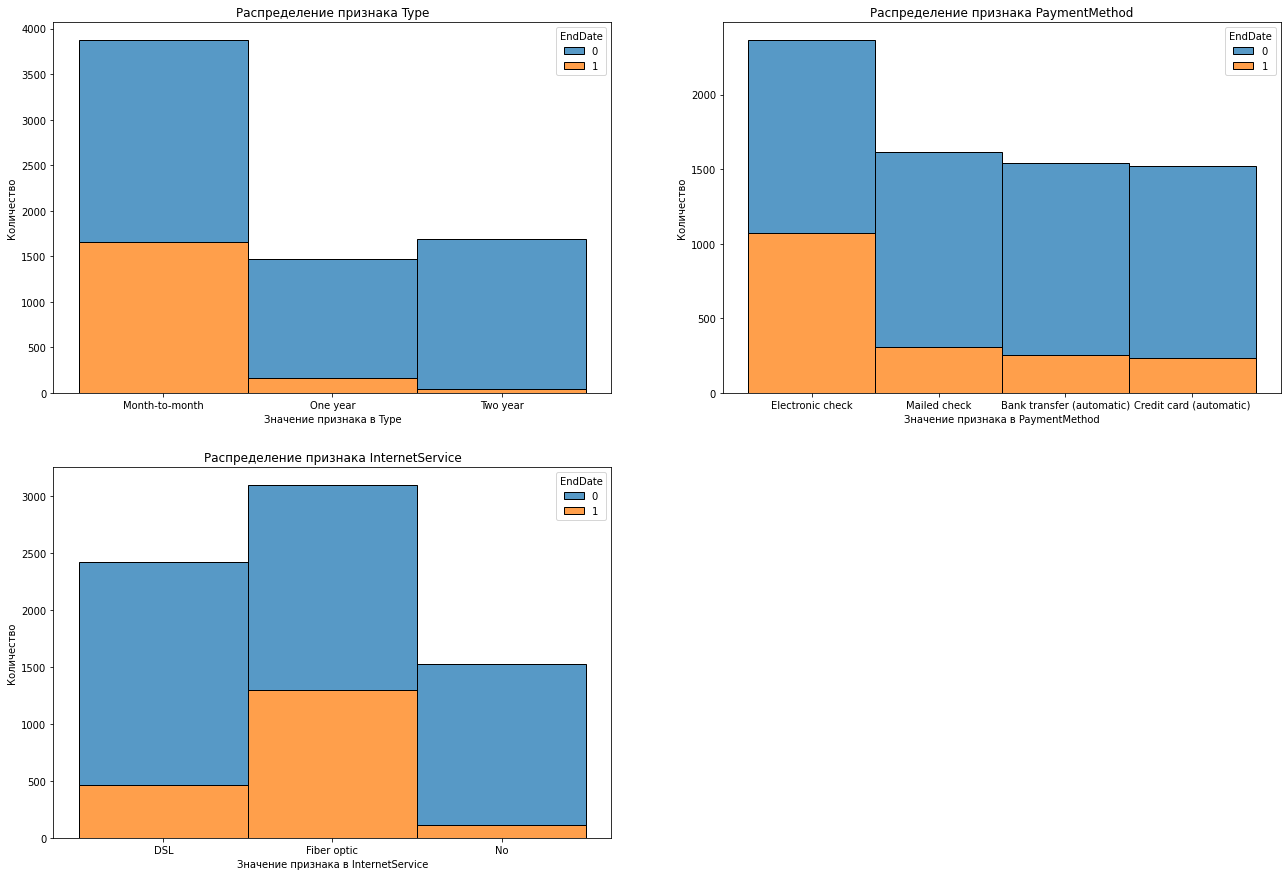

In [26]:
categorical_features = ['Type', 'PaymentMethod', 'InternetService']

plt.figure(figsize=(22, 15))


for i, feature in enumerate(categorical_features):
    ax = plt.subplot(2, 2, i+1)
    ax.set_title(f'Распределение признака {feature}')
    ax.set_xlabel(f'Значение признака в {feature}')
    ax.set_ylabel('Количество')
    sns.histplot(data=full_data, x=feature, hue='EndDate', multiple='stack', ax=ax)

plt.show()

### Распределение бинарных категориальных признаков

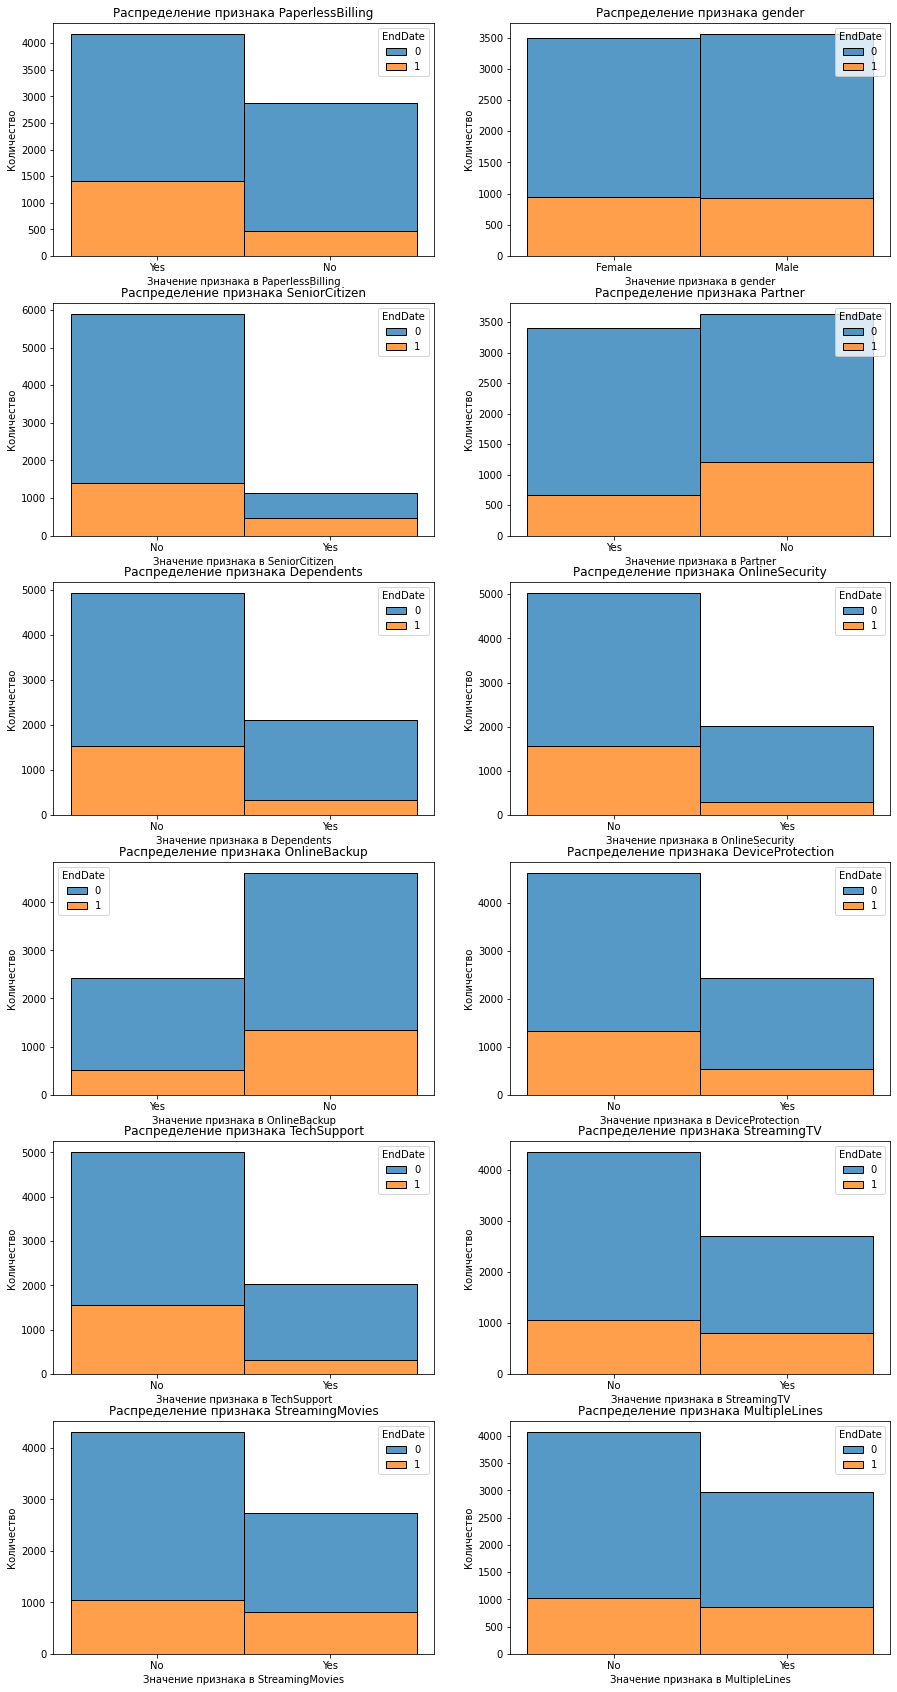

In [27]:
categorical_features = ['PaperlessBilling', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

plt.figure(figsize=(15, 30))
for i, feature in enumerate(categorical_features):
    ax = plt.subplot(6, 2, i+1)
    ax.set_title(f'Распределение признака {feature}')
    ax.set_xlabel(f'Значение признака в {feature}')
    ax.set_ylabel('Количество')
    sns.histplot(data=full_data, x=feature, hue='EndDate', multiple='stack', ax=ax)

plt.show()

### Распределение численных признаков

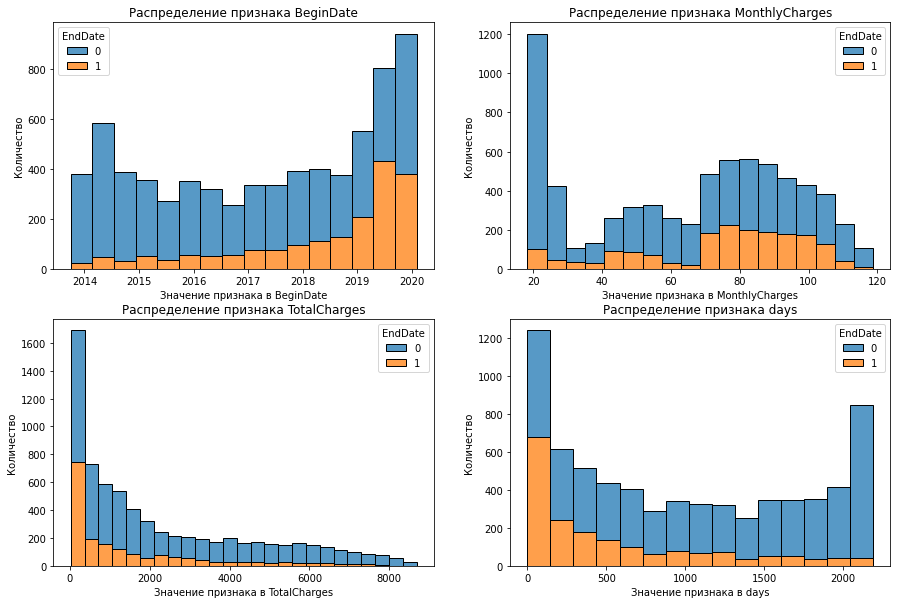

In [28]:
num_features = ['BeginDate', 'MonthlyCharges', 'TotalCharges', 'days']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    ax = plt.subplot(2, 2, i+1)
    ax.set_title(f'Распределение признака {feature}')
    ax.set_xlabel(f'Значение признака в {feature}')
    ax.set_ylabel('Количество')
    sns.histplot(data=full_data, x=feature, hue='EndDate', multiple='stack', ax=ax)

plt.show()

<AxesSubplot:xlabel='EndDate', ylabel='Count'>

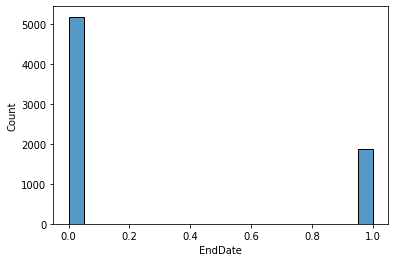

In [29]:
sns.histplot(data=full_data, x='EndDate', bins=20)

### Корреляция численных признаков

Пострим хитмэп численых признаков с указанием коэффициента пирсана для этих признаков.

<AxesSubplot:>

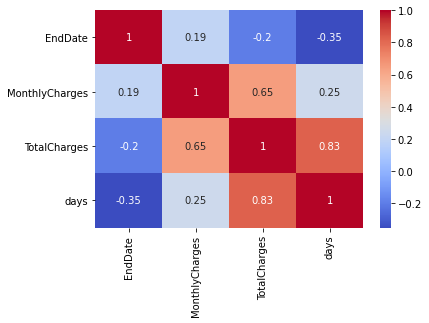

In [30]:
corr = full_data.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)

**Вывод по пункту 3:**<br>
Я рассмотрел распределения всех признаков для клиентов, которые расторгли договор с компанией и для тех которые еще остались. Возможно какие-то из признаков влияют на отток клиентов силнее чем другие.<br><br>
Анализ категориальных признаков показывает что клиенты у которых ежемесячный договор отказываются от услуг чаще чем те у кого годовой или двухгодичный догор. Это вполне закономерно так расторгнуть или не продлевать ежемесячный договор проще чем двухгодовой.<br>
А распределение признака InternetService показывает что клиенты которые используют тип соединения faber optic уходят из компании чаще тем те кто использует соединение DSL и это странно, так как соединение faber optic работает быстрее и стабильнее чем DSL. Возможно это связано с тем что компании-поставщики услуги не предоставляют подключение по DSL, а клиента нет возможности подключения оптоволоконной линии.<br><br>
При анализе бинарных категориальных признаков сложно сказать что какой-то из признаков сильно влияет на отток клиентов, так как соотношение тех кто ушел из компании и тех кто остался примерно одинаковое. Но можно отметить что клиенты у которых нет партнера отказываются от услуг чаще, приметно 30 процентах случаях, чем клиенты с партнерами.<br>
Также пенсионеры отказываются от услуг компании чаще, почти половина половина пришедших пенсионеров прекратили пользоваться услугами компании. Это может быть связано как сневыгодными условиями для пенсионеров, так и с тем что человек просто прекратил свое существование.<br><br>
Практически во всех признаках, в том числе и в целевом признаке, наблюдается отличия классов. В случае с целевым признаком это не хорошо, и может плохо сказаться на обучении модели, поэтому при обучении модельи нужно будет использовать взвещивание классов.<br><br>
Распределение значений в столбце `days`, имеет форму жолоба, много клиентов которые уже давно пользуются услугами компании и много тех кто недавно заключил договор. Это возможно связано с тем что в начале работы компании проводились больше рекламы, возможно были какие-то акции для подключения. Большшое количество клиентов, которые недавно заключили договор с компанией, возможно связанно с тем что, почувствовав отток клиентов, компания провела рекламные акции по привлечению новых клиентов.<br>
Так же стоит отметить что те кто заключили договор в начале работы компании реже отказываются от услуг, тоесть чем раньше человек заключил договор с компанией и чем дольше пользуется услугами компании, тем меньше верояности что он откажется от этих услуг.<br>
Большой отток клиентов, которые заключили договор за последний год, может говорить о том что условия и качество услуг не так хороши как казались изначально. <br>
Большое количество небольших ежемесячных платежей, до 30 долларов, так же может быть связано с тем что в последние два месяца в компании появилось много новых клиентов. Осносная же часть клиентов тратят на услуги от 70 до 100 долларов.<br><br>
Распеделение значений в `MonthlyCharges` показывает что те кто платят немного до 70 долларов в месяц покидают компанию реже, это вполне закономерно, если ежемесячный платеж не большой и все устраиват, можнопродолжать пользоваться услугами компании.<br>
В распределении значений `TotalCharges` наблюдается перекос значений влево. Это может говорить о том что многие клиенты не хотят платить много за услуги и с тем что многие клиенты, которые давно с компанией имеют не большие ежемесячные платежи.<br><br>
Анамалий в численных признаках не обнаруженно.<br>
Между признаками `days` и `TotalCharges` присутствует сильная связь, коэффициент корреляции Пирсона составляет 0.83 один из признаков предется удалить чтобы избежать утечки данных.

## Подготовка данных

При проведении исследовательского анализа я определил что данные в столбеце `BeginDate` не понадобятся для обучения модели.<br>
Также я определил что между признаками `days` и `TotalCharges` присутствует сильная связь, коэффициент корреляции Пирсона составляет 0.83, обучение модели с этими признаками может привести к утечке данных и модель переобучится, поэтому удалим один из признаков `TotalCharges`.

In [31]:
full_data.drop('TotalCharges', axis=1, inplace=True)
full_data.drop('BeginDate', axis=1, inplace=True)

### Выделение признаков и целевого признака

В датасете целевым признаком являются значения в столбце `EndDate`.

In [32]:
features = full_data.drop('EndDate', axis=1)
target = full_data['EndDate']

### Деление выборки

Разделим выборку на обучающую и тестовую в соотношении 3:1, 75% обучающей выборки и 25% тестовой и проверим размер выборок.

In [33]:
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.25, random_state=RANDOM_STATE)
print(f'Размер обучающей выборки: {features_train.shape}')
print(f'Размер тестовой выборки: {features_test.shape}')

Размер обучающей выборки: (5282, 17)
Размер тестовой выборки: (1761, 17)


### Кодирование категориальных признаков

В датасете присутствуют категориальные признаки, поэтому преобразую их в численные техникой прямого кодирования One-Hot Encoding, что бы не попасть в дамми-ловушку вызовим функцию pd.get_dummies() с аргументом drop_first=True.

In [34]:
columns=full_data.select_dtypes(include='object').columns

features_train_ohe = pd.get_dummies(features_train, columns, drop_first=True)
features_test_ohe = pd.get_dummies(features_test, columns, drop_first=True)

In [35]:
features_train_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 1535 to 1086
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         5282 non-null   float64
 1   days                                   5282 non-null   int64  
 2   Type_One year                          5282 non-null   uint8  
 3   Type_Two year                          5282 non-null   uint8  
 4   PaperlessBilling_Yes                   5282 non-null   uint8  
 5   PaymentMethod_Credit card (automatic)  5282 non-null   uint8  
 6   PaymentMethod_Electronic check         5282 non-null   uint8  
 7   PaymentMethod_Mailed check             5282 non-null   uint8  
 8   gender_Male                            5282 non-null   uint8  
 9   SeniorCitizen_Yes                      5282 non-null   uint8  
 10  Partner_Yes                            5282 non-null   uint8  
 11  D

In [36]:
print('Размер обучающей выборки:', features_train_ohe.shape)
print('Размер тестовой выборки:', features_test_ohe.shape)

Размер обучающей выборки: (5282, 21)
Размер тестовой выборки: (1761, 21)


Количество признаков в выборках 21, посмотрим совпадают ли наиманование признаков в обоих выборках. Посчитаем количества совпавших наиманований

In [37]:
print(f'Количество совпавших признаков: {(features_train_ohe.columns == features_test_ohe.columns).sum()}')

Количество совпавших признаков: 21


Поличество признаков и их наименования совпадают, значит все норм.

In [38]:
features_train_ohe

,MonthlyCharges,days,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_Yes,...,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
1535,64.20,215,0,0,0,0,1,0,1,1,...,0,0,0,1,1,0,1,0,0,1
1840,108.65,1979,0,1,0,0,0,0,1,0,...,1,1,0,1,0,1,1,1,1,1
2349,90.45,2191,0,1,0,0,0,0,1,0,...,1,1,0,0,1,1,1,0,0,1
1473,98.75,730,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,1
6219,25.70,31,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,24.40,31,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
41,69.20,2132,0,1,1,1,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
2774,50.05,184,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3974,79.25,1126,1,0,0,0,0,1,1,0,...,0,0,0,1,0,1,0,1,1,1


In [39]:
features_train_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 1535 to 1086
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         5282 non-null   float64
 1   days                                   5282 non-null   int64  
 2   Type_One year                          5282 non-null   uint8  
 3   Type_Two year                          5282 non-null   uint8  
 4   PaperlessBilling_Yes                   5282 non-null   uint8  
 5   PaymentMethod_Credit card (automatic)  5282 non-null   uint8  
 6   PaymentMethod_Electronic check         5282 non-null   uint8  
 7   PaymentMethod_Mailed check             5282 non-null   uint8  
 8   gender_Male                            5282 non-null   uint8  
 9   SeniorCitizen_Yes                      5282 non-null   uint8  
 10  Partner_Yes                            5282 non-null   uint8  
 11  D

Вместо категориальных признаков стали 0 и 1.
Количество признаков увеличелось с 17 до 21 в обоих выборках.

### Масштабирование численных признаков

Значения в столбцах, (кроме столбцов с единицами и нулями) имеют различные значения по величине и разбросу, эти различия могут повлиять на обучение модели. Необходимо привести признаки к единому масштабу. Столбцы значения которых необходимо масшабировать `days` и `MonthlyCharges` создадим их список. Создадим структуру для стандартизации данных — StandardScaler и настроим ее на обучающих данных, затем преобразуем все выборки функцией .transform()

In [40]:
features_train_ohe_scal = features_train_ohe.copy()
features_test_ohe_scal = features_test_ohe.copy()
numeric = ['days', 'MonthlyCharges']
scaler = StandardScaler()
scaler.fit(features_train_ohe[numeric])

features_train_ohe_scal[numeric] = scaler.transform(features_train_ohe[numeric])
features_test_ohe_scal[numeric] = scaler.transform(features_test_ohe[numeric])

In [41]:
features_train_ohe

,MonthlyCharges,days,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_Yes,...,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
1535,64.20,215,0,0,0,0,1,0,1,1,...,0,0,0,1,1,0,1,0,0,1
1840,108.65,1979,0,1,0,0,0,0,1,0,...,1,1,0,1,0,1,1,1,1,1
2349,90.45,2191,0,1,0,0,0,0,1,0,...,1,1,0,0,1,1,1,0,0,1
1473,98.75,730,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,1
6219,25.70,31,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,24.40,31,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
41,69.20,2132,0,1,1,1,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
2774,50.05,184,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3974,79.25,1126,1,0,0,0,0,1,1,0,...,0,0,0,1,0,1,0,1,1,1


In [42]:
features_train_ohe_scal

,MonthlyCharges,days,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_Yes,...,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
1535,-0.015296,-1.034117,0,0,0,0,1,0,1,1,...,0,0,0,1,1,0,1,0,0,1
1840,1.454207,1.326852,0,1,0,0,0,0,1,0,...,1,1,0,1,0,1,1,1,1,1
2349,0.852521,1.610596,0,1,0,0,0,0,1,0,...,1,1,0,0,1,1,1,0,0,1
1473,1.126916,-0.344832,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,1
6219,-1.288093,-1.280386,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,-1.331071,-1.280386,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
41,0.150003,1.531630,0,1,1,1,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
2774,-0.483090,-1.075608,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3974,0.482253,0.185182,1,0,0,0,0,1,1,0,...,0,0,0,1,0,1,0,1,1,1


**Вывод по пункту 4:**<br>
При подготовки данных к обучению моделей, я первым делом удалил неинформативный столбец `BeginDate` и столбец `TotalCharges`, который сильно коррелировал с признаком `days`.<br>
Далее я выделил признаки и целевой признак в соотношении 3:1, 75% обучающей выборки и 25% тестовой.<br>
Затем я выполнил кодирование категориальных признаком техникой прямого кодирования One-Hot Encoding.<br>
В конце сделал масштабирование численных признаков чтобы "сгладить" различия численных признаков по величие и разбросу значений. Отмасштабированные признаки сохранил в выборках features_train_ohe_scal и features_test_ohe_scal.

## Решение задачи

В данном проекте мы предсказываем ситуацию: ушёл ли клиент или нет, значит это задача бинарной классификации.
Для решения данной задачи подходят моделли классификации. Рассмотрим модели LogisticRegression, RandomForestClassifier и две модели градиентного бустинга LGBMClassifier и CatBoostClassifier.

### Модели и параметры

Инициализируем модели обучения, так как бинарных признаках присутствует перекос, то есть преобладание того или иного обекта, придадим объектам редкого класса больший вес указав аргумент class_weight='balanced'.<br>
Также создадим словари с диапазоном гиперпараметров для каждой модели.<br>

In [43]:
model_LG = LogisticRegression(random_state = RANDOM_STATE, class_weight='balanced')
model_RF = RandomForestClassifier(random_state = RANDOM_STATE,class_weight='balanced')
model_LGBM = LGBMClassifier(random_state = RANDOM_STATE,class_weight='balanced')
model_CB = CatBoostClassifier(random_state = RANDOM_STATE, 
                              loss_function='Logloss',
                              auto_class_weights='Balanced')

params_LG = {"max_iter":range(200,301,50)}
params_RF = {"n_estimators":range(110,131,10),"max_depth":range(6,8,1)}
params_LGBM = {
    'objective': ['binary'],
    'max_depth': range(9,10,1),
    'learning_rate': [0.1],
    'n_estimators': range(50,56,5),    
    }
params_CB = {"depth": [3,4], 'learning_rate': [0.1, 0.01]}

### Обучение моделей

Нипишим функцию, которая принимает модель машинного обучения, диамазон параметров для подбора, метрику оценки качества модели "roc_auc" и признаки.<br>
Функция при помощи GridSearchCV определит лучшее значение метрики и лучшие значения гиперпараметров модели для достижения этого значения метрики.<br>

In [44]:
def params_grid(model, params, scoring, features, target):
    '''
    Input: model - обучаемая модель, params - набор параметров модели, scoring -метрика оценки ошибки,
           features,target - признаки и целевой признак обучающей выборки.
    Output: model_grid,best_params,best_score - модель, ее лучшие параметры и 
            наименьшее значение метрики оценки ошибки
    Description: Функция ищет лучшие параметры из диапазона переданного в аргумент, 
                 для принимаемой в аргумент модели

    '''
    model_grid = GridSearchCV(model,params,cv=5, n_jobs=-1,scoring=scoring, verbose=5)
    model_grid.fit(features,target)
    best_params = model_grid.best_params_
    best_score = model_grid.best_score_
    return model_grid,best_params,best_score

#### Модель LogisticRegression

In [45]:
%%time
params_grid(model_LG, params_LG, 'roc_auc',  features_train_ohe_scal, target_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...................................max_iter=200; total time=   0.8s
[CV 2/5] END ...................................max_iter=200; total time=   0.7s
[CV 3/5] END ...................................max_iter=200; total time=   0.8s
[CV 4/5] END ...................................max_iter=200; total time=   1.6s
[CV 5/5] END ...................................max_iter=200; total time=   1.6s
[CV 1/5] END ...................................max_iter=250; total time=   1.4s
[CV 2/5] END ...................................max_iter=250; total time=   1.0s
[CV 3/5] END ...................................max_iter=250; total time=   1.8s
[CV 4/5] END ...................................max_iter=250; total time=   2.8s
[CV 5/5] END ...................................max_iter=250; total time=   1.0s
[CV 1/5] END ...................................max_iter=300; total time=   0.7s
[CV 2/5] END ...................................m

(GridSearchCV(cv=5,
              estimator=LogisticRegression(class_weight='balanced',
                                           random_state=130323),
              n_jobs=-1, param_grid={'max_iter': range(200, 301, 50)},
              scoring='roc_auc', verbose=5),
 {'max_iter': 200},
 0.8432078086402658)

#### Модель RandomForestClassifier

In [46]:
%%time
params_grid(model_RF, params_RF, 'roc_auc', features_train_ohe, target_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..................max_depth=6, n_estimators=110; total time=   0.4s
[CV 2/5] END ..................max_depth=6, n_estimators=110; total time=   0.3s
[CV 3/5] END ..................max_depth=6, n_estimators=110; total time=   0.3s
[CV 4/5] END ..................max_depth=6, n_estimators=110; total time=   0.3s
[CV 5/5] END ..................max_depth=6, n_estimators=110; total time=   0.3s
[CV 1/5] END ..................max_depth=6, n_estimators=120; total time=   0.3s
[CV 2/5] END ..................max_depth=6, n_estimators=120; total time=   0.4s
[CV 3/5] END ..................max_depth=6, n_estimators=120; total time=   0.3s
[CV 4/5] END ..................max_depth=6, n_estimators=120; total time=   0.3s
[CV 5/5] END ..................max_depth=6, n_estimators=120; total time=   0.4s
[CV 1/5] END ..................max_depth=6, n_estimators=130; total time=   0.4s
[CV 2/5] END ..................max_depth=6, n_est

(GridSearchCV(cv=5,
              estimator=RandomForestClassifier(class_weight='balanced',
                                               random_state=130323),
              n_jobs=-1,
              param_grid={'max_depth': range(6, 8),
                          'n_estimators': range(110, 131, 10)},
              scoring='roc_auc', verbose=5),
 {'max_depth': 7, 'n_estimators': 130},
 0.8522681721205647)

#### Модель LightGBMClassifier

In [47]:
params_grid(model_LGBM, params_LGBM, 'roc_auc', features_train_ohe, target_train)

#### Модель CatBoostClassifier

In [48]:
%%time
params_grid(model_CB, params_CB, 'roc_auc', features_train_ohe, target_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0:	learn: 0.6551921	total: 50.9ms	remaining: 50.8s
1:	learn: 0.6255236	total: 52.7ms	remaining: 26.3s
2:	learn: 0.6027118	total: 54.1ms	remaining: 18s
3:	learn: 0.5867222	total: 55ms	remaining: 13.7s
4:	learn: 0.5729717	total: 56ms	remaining: 11.1s
5:	learn: 0.5615947	total: 57.1ms	remaining: 9.45s
6:	learn: 0.5516560	total: 58.1ms	remaining: 8.24s
7:	learn: 0.5428603	total: 59.2ms	remaining: 7.34s
8:	learn: 0.5352367	total: 60.1ms	remaining: 6.62s
9:	learn: 0.5258434	total: 61.2ms	remaining: 6.06s
10:	learn: 0.5184152	total: 62.3ms	remaining: 5.6s
11:	learn: 0.5140512	total: 63.4ms	remaining: 5.22s
12:	learn: 0.5076885	total: 64.5ms	remaining: 4.89s
13:	learn: 0.5042951	total: 65.4ms	remaining: 4.61s
14:	learn: 0.5021120	total: 66.4ms	remaining: 4.36s
15:	learn: 0.4994262	total: 67.5ms	remaining: 4.15s
16:	learn: 0.4974323	total: 68.5ms	remaining: 3.96s
17:	learn: 0.4943406	total: 69.6ms	remaining: 3.8s
18:	learn: 0.4894239	t

(GridSearchCV(cv=5,
              estimator=<catboost.core.CatBoostClassifier object at 0x7faac782a6a0>,
              n_jobs=-1,
              param_grid={'depth': [3, 4], 'learning_rate': [0.1, 0.01]},
              scoring='roc_auc', verbose=5),
 {'depth': 3, 'learning_rate': 0.1},
 0.9206686268797555)

**Вывод по пункту 5:**<br> 
Я провел оценку качества обучения четырех моделей при помощи GridSearchCV, с подбором гиперпараметров для каждой модели, в качестве оценки качества я использовал метрику AUC-ROC. <br>
По итогам оценки качества моделей получили следующие значения:

| Модели |    Параметры модели |    Значение метрики   |
| :--- | :----------- | :----------|
| LogisticRegression | 'max_iter': 200 | 0.8432 |
| RandomForestClassifier | 'max_depth': 7 | 0.8522 |
|                        | 'n_estimators': 130 ||
| LGBMClassifier | 'learning_rate': 0.1 | 0.8813 |
|                | 'n_estimators': 55 |  |
|                | 'max_depth': 9 |  |
|                | 'objective': 'binary' |  |
| CatBoostClassifier | 'depth': 3 | 0.9206 |
|                    | 'learning_rate': 0.1 |  |

Лучшей моделью для решения данной задачи, определения оттока клиентов, является модель CatBoostClassifier со значением AUC-ROC равным 0.9206.

## Тестирование модели

Мы определили что лучшей моделью для решения этой задачи является модель CatBoostClassifier, выполним тестирование этой модели.

0:	learn: 0.6550916	total: 2.72ms	remaining: 2.72s
1:	learn: 0.6257555	total: 5.21ms	remaining: 2.6s
2:	learn: 0.6069500	total: 6.93ms	remaining: 2.3s
3:	learn: 0.5888963	total: 9.2ms	remaining: 2.29s
4:	learn: 0.5736111	total: 11ms	remaining: 2.19s
5:	learn: 0.5634327	total: 13.6ms	remaining: 2.25s
6:	learn: 0.5488244	total: 15.6ms	remaining: 2.22s
7:	learn: 0.5417893	total: 16.8ms	remaining: 2.08s
8:	learn: 0.5360741	total: 18ms	remaining: 1.98s
9:	learn: 0.5290976	total: 19.2ms	remaining: 1.9s
10:	learn: 0.5225336	total: 20.6ms	remaining: 1.85s
11:	learn: 0.5185921	total: 21.7ms	remaining: 1.79s
12:	learn: 0.5147542	total: 22.9ms	remaining: 1.74s
13:	learn: 0.5112409	total: 24.1ms	remaining: 1.7s
14:	learn: 0.5073183	total: 25.4ms	remaining: 1.67s
15:	learn: 0.5005228	total: 26.8ms	remaining: 1.65s
16:	learn: 0.4951060	total: 28.1ms	remaining: 1.62s
17:	learn: 0.4930131	total: 29.2ms	remaining: 1.59s
18:	learn: 0.4907794	total: 30.6ms	remaining: 1.58s
19:	learn: 0.4881927	total: 31.

<function matplotlib.pyplot.show(close=None, block=None)>

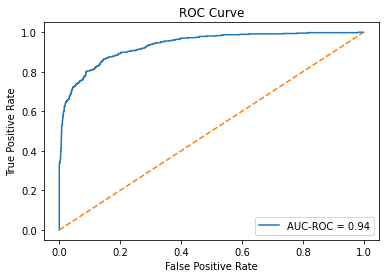

In [49]:
model_CB = CatBoostClassifier(random_state = RANDOM_STATE, auto_class_weights='Balanced', 
                                   depth=3, learning_rate=0.1)
model_CB.fit(features_train_ohe, target_train)
prededict = model_CB.predict(features_test_ohe)

probabilities = model_CB.predict_proba(features_test_ohe)[:,1]
fpr, tpr, threshold = roc_curve(target_test, probabilities)

score_roc_auc = roc_auc_score(target_test, probabilities)

score_accuracy = accuracy_score(target_test,prededict)

print(f'Значение AUC-ROC тестовой выборки: {score_roc_auc}')
print(f'Значение accuracy тестовой выборки: {score_accuracy}')

plt.plot(fpr, tpr, label=f'AUC-ROC = {score_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show

<div class="alert alert-danger">
🚫 
    
- для расчета метрики roc_auc мы должны брать вероятность принадлежности к целевому классу
    
    
    preds = best_model.predict_proba(X_test)[:, 1]
   
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    
</div>

### Иследование важности признаков

0:	learn: 0.6550916	total: 1.65ms	remaining: 1.64s
1:	learn: 0.6257555	total: 3.23ms	remaining: 1.61s
2:	learn: 0.6069500	total: 4.58ms	remaining: 1.52s
3:	learn: 0.5888963	total: 5.66ms	remaining: 1.41s
4:	learn: 0.5736111	total: 6.77ms	remaining: 1.35s
5:	learn: 0.5634327	total: 8.01ms	remaining: 1.33s
6:	learn: 0.5488244	total: 9.34ms	remaining: 1.32s
7:	learn: 0.5417893	total: 10.6ms	remaining: 1.31s
8:	learn: 0.5360741	total: 11.8ms	remaining: 1.3s
9:	learn: 0.5290976	total: 12.9ms	remaining: 1.27s
10:	learn: 0.5225336	total: 14.1ms	remaining: 1.26s
11:	learn: 0.5185921	total: 15.3ms	remaining: 1.26s
12:	learn: 0.5147542	total: 16.5ms	remaining: 1.25s
13:	learn: 0.5112409	total: 17.7ms	remaining: 1.24s
14:	learn: 0.5073183	total: 18.9ms	remaining: 1.24s
15:	learn: 0.5005228	total: 20.2ms	remaining: 1.24s
16:	learn: 0.4951060	total: 21.5ms	remaining: 1.24s
17:	learn: 0.4930131	total: 22.8ms	remaining: 1.24s
18:	learn: 0.4907794	total: 23.9ms	remaining: 1.23s
19:	learn: 0.4881927	to

,feature,importance
1,days,73.581995
0,MonthlyCharges,8.220199
3,Type_Two year,4.546929
12,InternetService_Fiber optic,2.755428
2,Type_One year,1.538036
6,PaymentMethod_Electronic check,1.159320
13,InternetService_No,0.881056
7,PaymentMethod_Mailed check,0.696412
17,TechSupport_Yes,0.666350
4,PaperlessBilling_Yes,0.664590


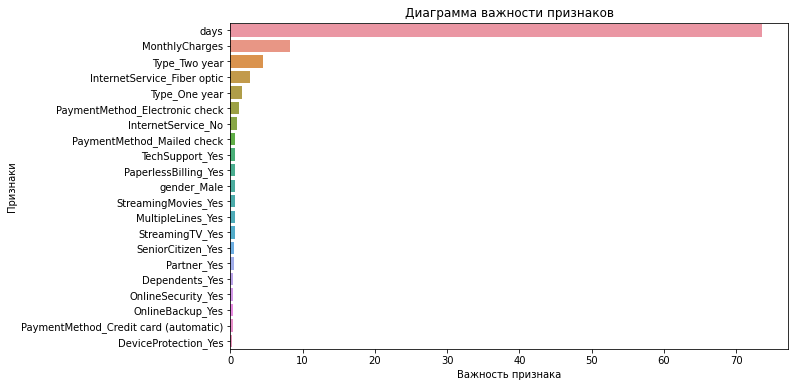

In [50]:
train_pool = Pool(features_train_ohe, target_train)

model_CB = CatBoostClassifier(random_state=RANDOM_STATE, auto_class_weights='Balanced', 
                              depth=3, learning_rate=0.1)
model_CB.fit(train_pool)

feature_importances = model_CB.get_feature_importance()

importances_df = pd.DataFrame({'feature': features_train_ohe.columns.tolist(), 
                      'importance': feature_importances})

importances_df = importances_df.sort_values('importance', ascending=False)

display(importances_df)
    
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances_df)
plt.title('Диаграмма важности признаков')
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.show()

<div class="alert alert-success">
<b>✔️</b> Вот небольшие статьи по метрикам в машинном обучении, если заинтересует:

https://habr.com/ru/company/ods/blog/328372/ 
    
https://habr.com/ru/company/jetinfosystems/blog/420261/

</div>

**Вывод по пункту 6:**<br>
Я провел тестирование выбраной модели CatBoostClassifier с определенными ранее гиперпараметрами. Обучил модель на признаках обучающей выборки и модель сделала предсказания на основании тестовых признаков, далее я оценил качество предсказаний модели. Для оценки качества модели были выбраны метрики ROC-AUC и Accuracy. Значение метрики AUC-ROC тестовой выборки, а именно вероятность предсказания истинно-положительных предсказаний TPR равно 0.9350. Значение accuracy = 0.8597387847813742, то есть в 85% случаев модель предсказывает верный ответ.<br>
Провел исследование значимости признаков. Судя по расчету значимости признаков самым значемым признаком является признак `days`, чем дольше клиент с компанией тем меньше верояность что он расторгнет договор, эта зависимость была видна при исследовательском анализе. Самый менее значимый признак `DeviceProtection`.

## Отчет

Задачей данного проекта является, оперделение намерения клиента расторгнуть договор оказания услуг и уйти из компании, таким клиентам будут предложены промокоды и специальные условия.<br>
Мною был составлен план выполнения работ из семи пунктов:
1. Анализ данных:
2. Предобработка данных:
3. Исследовательский анализ данных:
4. Подготовка данных:
5. Решение задачи:
6. Тестирование модели:
7. Общий вывод:<br>

В данном проекте я провел исследование информации предоставленной оператором связи «Ниединогоразрыва.ком». Для исследования были предоставленны четыре дадасета с информацией о клиентах, услугах, которыми пользуются клиенты и о затратах на предоставляемые услуги:
- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.


1.
- На первом этапе анализа данных я озакомился с предоставленными датасетами. Посмотрел пять случайных строк в датасете, проверил информацию и описание каждого дадасета, посчитал наличие пропусков и дубликатов.<br>
- По каждому датасету я сделал описание всех столбцов с указанием типа данных в столбце, наименования признаков, распределения значений, наличия пропусков и т.д.<br>
В целом состояние и содержание датасетов оцениваю как хорошее и требует большой предобработки.<br>

2.
- На этапе предобработки данных, первым делом я объединил четыре исходных датасета в один общий. В каждом исходном датасете присутствовал столбец `customerID` по которому было не сложно объединить все четыре таблицы в одну.<br>
- Клиенты опереатора связи используют все предоставляемые услугами или частично (кто-то пользуется интернетом и телефонией, а кто-то только интернетом или телефоном). По этой причине исходные датасеты имели разное количество строк и при обединении в общей таблице появились пропуски. Пропуски в общем датасете я заполнил значением "No".<br>
- В общем датасете присутствовали столбцы `BeginDate` и `EndDate` все значения в этих столбцах я привел к типу данных datetime. Сами по себе данные в этих столбцах использовать при обучении модели нельзя, но на основе этих данных можно вывести новай признак. Из значений столбца `EndDate` я вычел значения столбца `BeginDate` и получил признак `days` - количество дней которые клиент пользуется услугами компании. 
- Признак `days` отсутствовал в изначальном датасете, так как он получен на основе двух других признаков, то является сгенерированным.<br>
- Значения столбца `EndDate` я использовал как целевой признак. Для подготовки целевого признака значения соответствующие актуальной дате датасета ('2020-02-01') я заменил значением "0" - клиент остался, а остальные более рание даты заменил значением "1" -  клиент ушел.<br>
- Также при первичном анализе в столбце `TotalCharges` были выявлены пустые ячейки - значения с пробелом. Такие пустые ячейки я заменил значениями соответствующими значения в столбце `MonthlyCharges`.<br>
- В завершении предобработки я удалил столбец `customerID`, так как он содержит информации пригодной для обучения модели.<br>

3.
- При исследовательском анализе я построил диаграммы распределения категориальных, категориальных бинарных и численных признаков для клиентов которые ушли и которые остались, чтобы понять какие из признаков влияют на отток клиентов в большей или меньшей степени. Сделал сранительные описания нескольких прзнаков.
- Так же была проверенна корреляция численных признаков. Я построил heatmape для численных признаков с указанием корреляции на пересечениях каждого признака. При оценке корреляции между признаками `days` и `TotalCharges` выявилась сильная связь, коэффициент корреляции Пирсона составил 0.83, чтобы избежать утечки данных признак `TotalCharges` пришлось удалить.

4.
- При подготовки данных к обучению моделей, я первым делом удалил неинформативный столбец `BeginDate` и столбец `TotalCharges`, который сильно коррелировал с признаком `days`.<br>
- Далее я выделил признаки и целевой признак в соотношении 3:1, 75% обучающей выборки и 25% тестовой.<br>
- Затем я выполнил кодирование категориальных признаком техникой прямого кодирования One-Hot Encoding.<br>
- В конце сделал масштабирование численных признаков чтобы "сгладить" различия численных признаков по величие и разбросу значений. Отмасштабированные признаки сохранил в выборках features_train_ohe_scal и features_test_ohe_scal.

5.
- Для решения данной задачи я рассматривал четыре модели машинного обучения: линейную модель LogisticRegression, RandomForestClassifier и две модели градиентного бустинга LGBMClassifier и CatBoostClassifier.
- Сначала я иницализировал модели выбраные модели и составил словари с диапазоном гиперпараметров моделий для подбора отимальных.
- параметр RANDOM_STATE=130323 я зафиксировал в ячейке со всеми импортами.
- Для обучения моделей использвались следующие признаки:
      features_train_ohe.columns
           
      Index(['MonthlyCharges', 'days', 'Type_One year', 'Type_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'MultipleLines_Yes'],
       dtype='object')
- целевой признак `EndDate`.
- Далее написал функцию которая принимает модель обучения, признаки и целевой признак и словари с гиперпараметрам. Функция обучает модели на обучающей выборке и с помощью GridSearchCV выполняет перебор заданных гиперпараметров и выберает оптимальные при достижении лучшего значения матрики качества.

- Для оценки качества моделей была выбрана метрика ROC-AUC. По итогам обучения моделей я получил следующие значения метрик для каждой модели:

| Модели |    Параметры модели |    Значение метрики   |
| :--- | :----------- | :----------|
| LogisticRegression | 'max_iter': 200 | 0.8432 |
| RandomForestClassifier | 'max_depth': 7 | 0.8522 |
|                        | 'n_estimators': 130 ||
| LGBMClassifier | 'learning_rate': 0.1 | 0.8813 |
|                | 'n_estimators': 55 |  |
|                | 'max_depth': 9 |  |
|                | 'objective': 'binary' |  |
| CatBoostClassifier | 'depth': 3 | 0.9206 |
|                    | 'learning_rate': 0.1 |  |

- Лучшей моделью для решения данной задачи, определения оттока клиентов, стала модель CatBoostClassifier со значением AUC-ROC равным 0.9206.

6.
- Лучшей моделью для решения данной задачи, прогнозирования оттока клиентов компании опреатора связи, по итогам обучения стала модель CatBoostClassifier, которую я протестировал на признаках тестовой выборки.
- Значение метрики AUC-ROC тестовой выборки, а именно вероятность предсказания истинно-положительных предсказаний TPR равно 0.9350. 
- Дополнительной метрикой оценки качества модели была выбрана метрика accuracy ее значение на тестовой выборке 0.8597, то есть почти в 86% случаев модель предсказывает верный ответ.<br>
- Также при проведении тестирования я исследовал значимость признаков. Судя по расчету значимости признаков самым значемым признаком является признак `days`, чем дольше клиент с компанией тем меньше верояность что он расторгнет договор, эта зависимость была видна при исследовательском анализе. Самый менее значимый признак `DeviceProtection`.

7.
- Итогом выполнения проекта стал данный отчет с описанием задачи проекта, основных шагов и выводов о проделанной работе.<br>
- Все шаги выполнения данного проекта были выполнены в соответствии с намеченым планом.
- В ходе проекта, на этапе обучения моделей, возникали трудности с получением заданного значения метрика качества. Возникщие затруднения удалось решить изменением диаказона для подбора гиперпараметров моделей.

<div class="alert alert-success"> 
    
Здесь хочу добавить несколько рекомендаций на будущее:
    
- для анализа данных по ситуации можно применять библиотеки pandas_profiling или sweetviz. Когда нужен оперативный отчет по датафрейму, можно воспользоваться такими инструментами для автоматизации. Но в учебных проектах мы делали вручную, поскольку должны были всему научиться;
    
- следует отметить, что можно использовать аналитические методы проверки гипотез для оценки влияния признаков на отток. Например, можно воспользоваться инструментом ANOVA для дисперсионного анализа: https://www.reneshbedre.com/blog/anova.html
    
***

Далее, хочу добавить некоторые ссылки на полезные ресурсы по машинному обучению:

https://academy.yandex.ru/handbook/ml онлайн-учебник от Школы анализа данных Яндекса, в котором описаны теоретические основы работы моделей машинного обучения;

https://www.youtube.com/watch?v=xl1fwCza9C8 познавательное видео по настройке модели CatBoost

https://habr.com/ru/company/ods/blog/322626/ на Habr можно закрепить свои знания, порешав задачи из цикла статей — Открытый курс машинного обучения

https://github.com/esokolov/ml-course-hse — на гитхаб есть репозиторий с задачами из курса по машинному обучению от Евгения Соколова, можно использовать как дополнительный материал для закрепления знаний.

https://habr.com/ru/company/avito/blog/571094/ — материалы по A/B тестам.


Направление ML: уверенные знания классических моделей машинного обучения; хорошие знания SQL; понимание алгоритмов машинного обучения — как устроена модель линейной регрессии, модели случайного леса, градиентного бустинга и т.д. На собеседовании могут спросить, как работает какая-нибудь модель «под капотом», очень любят градиентный бустинг и случайный лес. Здесь поможет учебник https://academy.yandex.ru/handbook/ml

По алгоритмам есть много разных курсов, платных и бесплатных. Можно попробовать Тренировки по Алгоритмам от Яндекса https://yandex.ru/yaintern/algorithm-training (бесплатно, хороший курс). Насколько знаю, у Практикума тоже есть курс по алгоритмам.

   
</div>